In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import load_boston
from pandas.plotting import scatter_matrix as sm
import seaborn as sns

In [2]:
boston = load_boston()

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [3]:
data = pd.DataFrame(boston.data)

In [4]:
data.columns = boston.feature_names
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [5]:
data['PRICE'] = boston.target
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
data.shape

(506, 14)

In [8]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


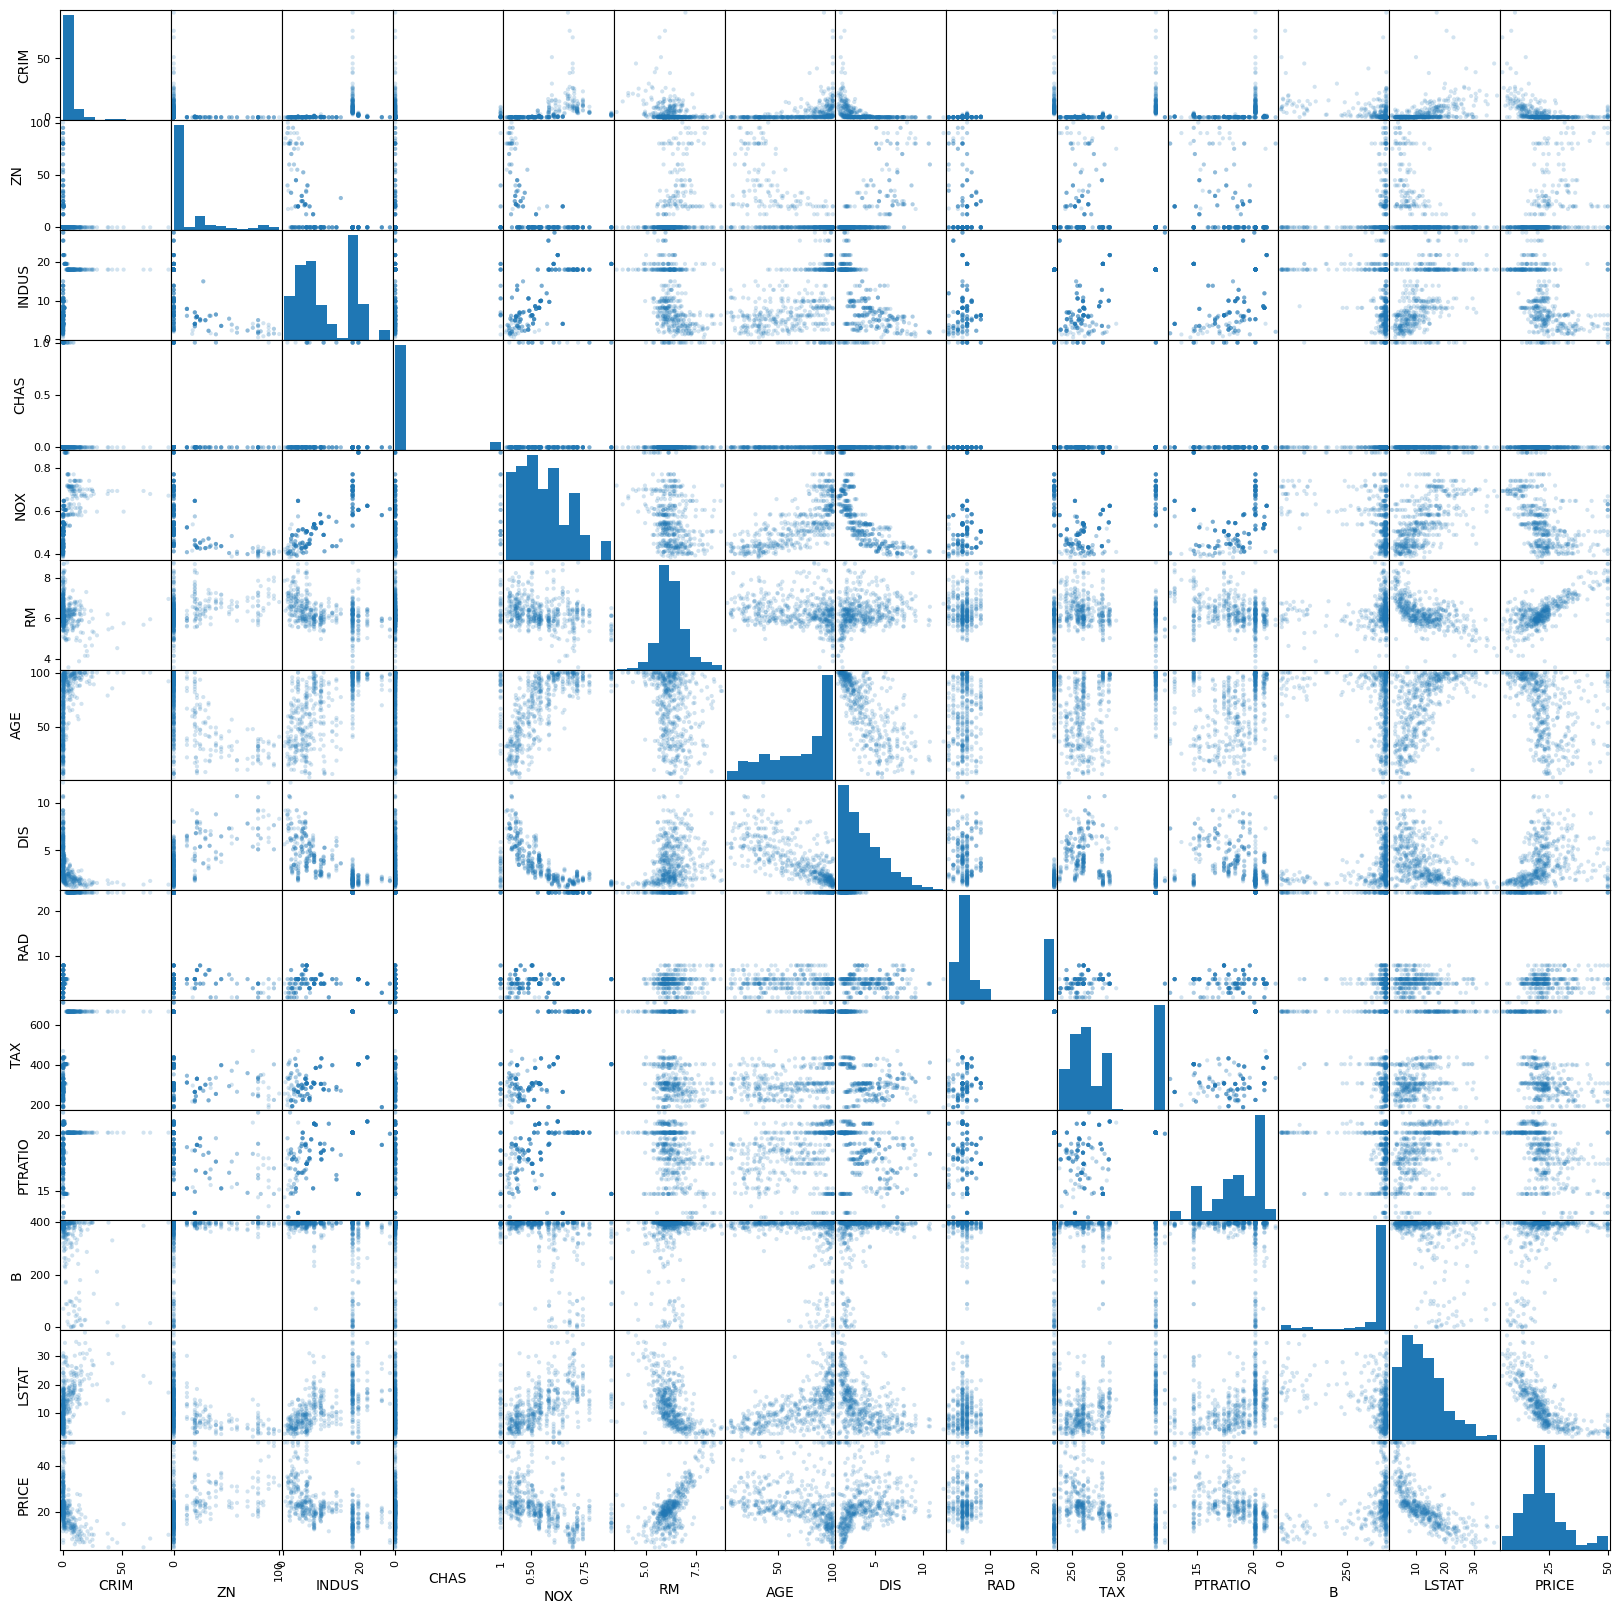

In [11]:
sm(data, alpha=0.2, figsize=(20,20))
plt.show()

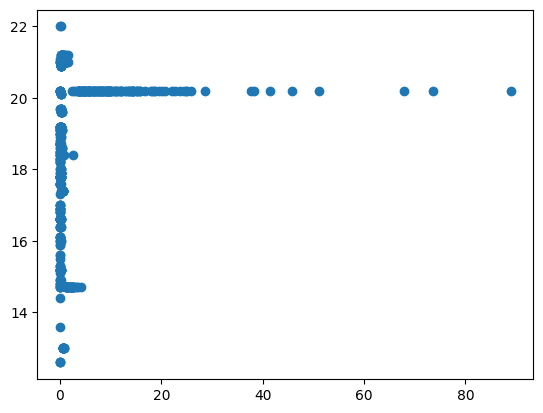

In [12]:
plt.scatter(x=data['CRIM'], y=data['PTRATIO'])
plt.show()  # weak positive correlation

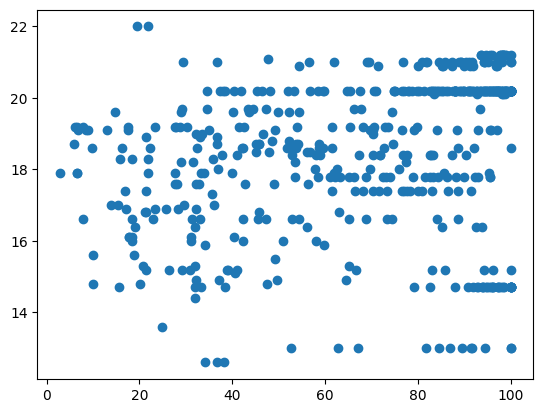

In [13]:
plt.scatter(x=data['AGE'], y=data['PTRATIO'])
plt.show()  # no correlation

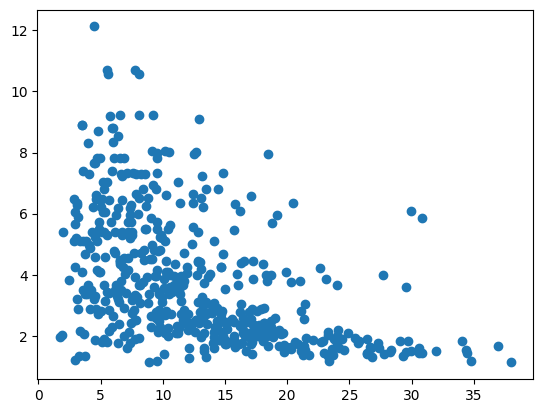

In [14]:
plt.scatter(x=data['LSTAT'], y=data['DIS'])
plt.show()  # weak -ve correlation

In [15]:
corr = data.corr()
corr  # near 1 is strong +ve correlation & near -1 is strong -ve correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

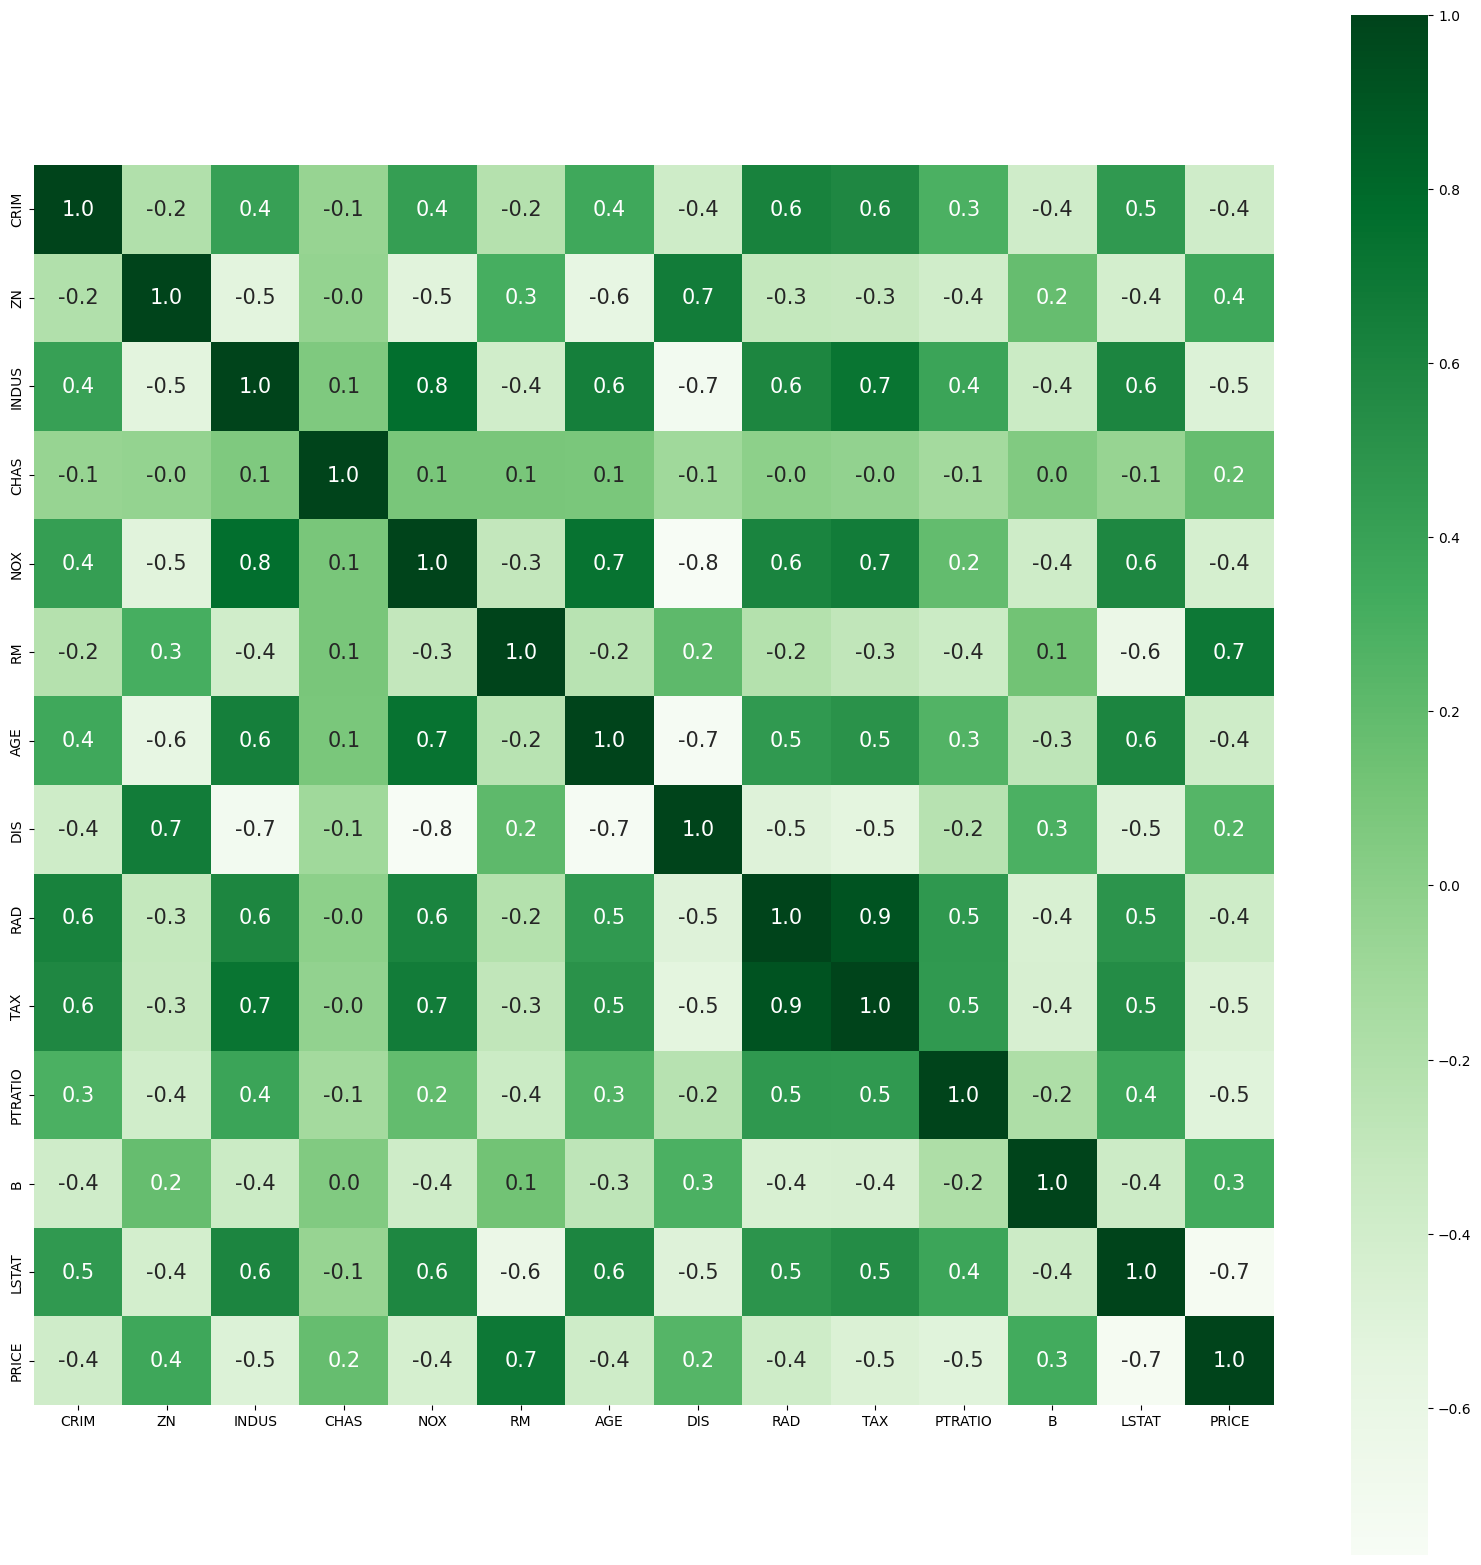

In [16]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [17]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [18]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [19]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
predict = lm.predict(X_test)
predict = np.round(predict, 2)
predict

array([11.07, 26.48, 17.34, 19.19, 36.36, 24.77, 31.  , 19.94, 19.22,
       24.43, 28.32, 28.41, 19.27, 33.82, 21.29, 15.11, 20.98, 11.29,
       11.86, 13.88,  5.37, 17.55, 20.58, 22.6 , 16.08, 20.46, 19.11,
       14.38, 21.23, 17.52, 14.41, 23.68, 33.74, 22.03, 17.62, 19.97,
       30.24, 34.7 , 23.86, 24.31, 36.13, 31.98, 19.63, 31.61, 34.58,
       25.63, 39.95, 17.61, 19.9 , 23.4 , 33.7 , 25.62, 18.26, 27.27,
       13.46, 23.43, 24.44, 33.52, 17.  , 37.94, 15.95, 19.33, 31.84,
       15.25, 38.4 , 27.45, 34.36,  9.37, 19.43, 21.99, 22.8 , 22.51,
       22.31, 27.84, 16.41, 22.56, 16.51, 25.11, 13.77, 19.79, 22.1 ,
       20.27, 28.15, 19.52, 30.33, 22.79, 29.27, 19.43, 24.8 , 37.46,
       31.06, 41.34, 18.46, 36.68, 19.41, 23.62, 27.93, 24.42,  9.46,
       20.68,  8.99, 28.45, 31.88, 14.04, 24.83, 19.94, 36.9 , 31.07,
       33.92, 28.65, 31.1 , 22.82, 11.58, 29.47, 37.06, 23.02, 41.8 ,
       18.44,  3.43, 18.57, 22.21, 16.71, 28.  , 28.42, 19.64, 18.76,
       35.38, 13.12,

accuracy :- 71.2181837740919


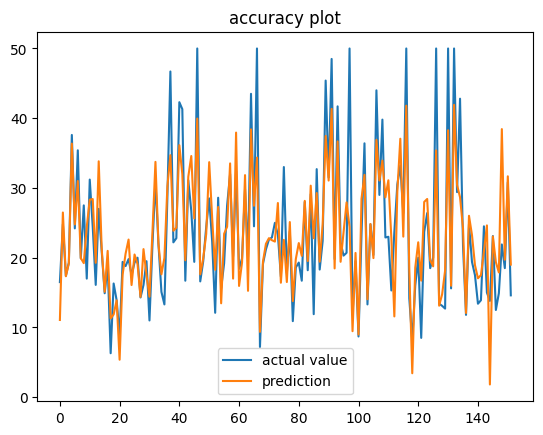

In [21]:
# check accuracy
acc = lm.score(X_test, y_test)
print('accuracy :-', acc*100)
plt.plot(list(y_test), label='actual value')
plt.plot(predict, label='prediction')
plt.title('accuracy plot')
plt.legend()
plt.show()

In [22]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
y_pred = reg.predict(X_test)
y_pred

array([17.557, 23.622, 19.253, 16.986, 46.937, 23.794, 34.528, 18.748,
       15.407, 16.11 , 29.367, 23.63 , 20.527, 24.422, 21.343, 13.789,
       20.034, 12.234, 12.833, 16.028,  7.956, 15.413, 19.923, 20.083,
       20.163, 20.408, 16.349, 15.841, 21.569, 18.837, 14.2  , 23.146,
       32.668, 22.206, 15.038, 13.636, 31.394, 44.39 , 24.154, 23.245,
       45.848, 28.379, 13.084, 30.257, 28.927, 20.657, 49.135, 19.52 ,
       21.403, 22.669, 30.771, 22.593, 13.18 , 27.453, 15.113, 20.896,
       25.11 , 31.684, 20.165, 30.282, 17.616, 21.155, 26.5  , 20.413,
       44.529, 27.655, 29.259,  8.263, 19.269, 22.19 , 22.378, 20.518,
       25.807, 26.371, 16.878, 33.746, 15.663, 23.259, 14.812, 22.115,
       19.751, 15.772, 27.206, 20.604, 24.723, 20.804, 33.474, 20.641,
       21.049, 47.369, 26.866, 48.442, 19.883, 47.479, 21.478, 21.054,
       21.456, 29.185, 14.899, 19.508,  9.399, 20.887, 35.049, 15.454,
       24.019, 20.139, 38.66 , 32.206, 45.363, 22.571, 22.256, 20.976,
      

accuracy :- 83.07493980867775


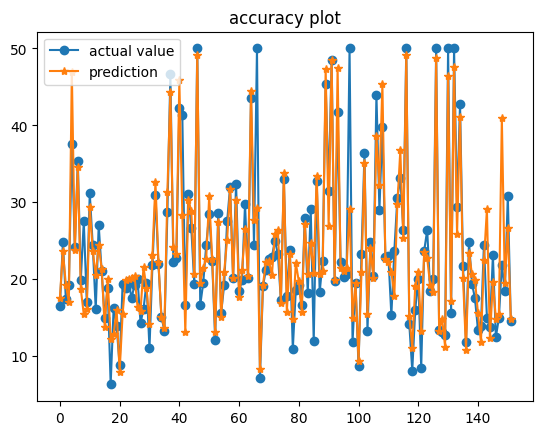

In [24]:
acc = reg.score(X_test, y_test)
print('accuracy :-', acc*100)
plt.plot(list(y_test), label='actual value', marker='o')
plt.plot(y_pred, label='prediction', marker='*')
plt.title('accuracy plot')
plt.legend()
plt.show()

In [25]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
svm = svm.SVR()

In [26]:
# Train the model using the training sets 
svm.fit(X_train, y_train)

SVR()

In [27]:
y_pred = svm.predict(X_test)
y_pred

array([21.86284538, 23.60620192, 22.37381495, 22.63407185, 22.23075477,
       23.27740636, 25.13552649, 16.21735756, 14.00228692, 19.33168132,
       22.35935749, 24.17507379, 22.47646397, 19.67810706, 22.68735131,
       13.47734443, 22.34518227, 15.58997028, 14.19367161, 21.13801759,
       13.38736719, 18.52349212, 23.68853828, 20.61063457, 21.86953194,
       20.73719635, 22.49041788, 19.53898121, 13.84443749, 20.64308835,
       13.7595277 , 23.55584808, 23.04530755, 24.1422871 , 16.02952902,
       15.99895338, 23.27132053, 23.08320259, 23.19673228, 23.34270425,
       23.24390494, 19.90908451, 15.23685609, 24.51834884, 22.19717865,
       23.18706954, 24.57110704, 23.39805998, 16.2362258 , 23.23339056,
       24.76524926, 19.4827401 , 15.78221949, 23.36573356, 17.86335168,
       19.88844714, 20.88240005, 24.16196741, 21.65747823, 24.28351444,
       19.46590196, 15.68346172, 21.661353  , 15.88385542, 23.65951656,
       24.16187366, 15.93211609, 13.3832652 , 16.22789327, 16.55

accuracy :- 13.09163041541198


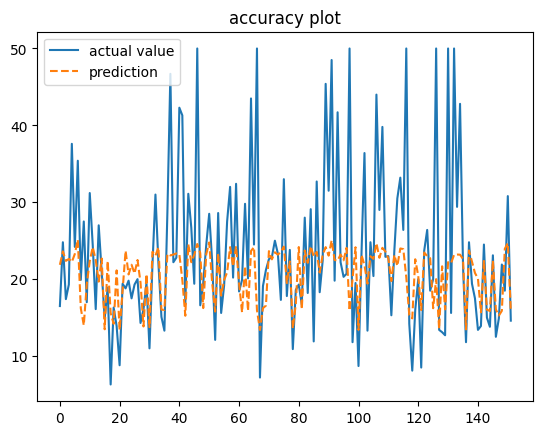

In [28]:
acc = svm.score(X_test, y_test)
print('accuracy :-', acc*100)
plt.plot(list(y_test), label='actual value')
plt.plot(y_pred, label='prediction', linestyle='--')
plt.title('accuracy plot')
plt.legend()
plt.show()

In [29]:
lm.predict([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]]) # linear regression

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29.54307499])

In [30]:
reg.predict([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]])  # regression  correct result = 24.0

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([24.926])

In [31]:
svm.predict([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]])  #svm

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([22.98952997])